In [1]:
! python --version

Python 3.7.3


In [2]:
%matplotlib inline

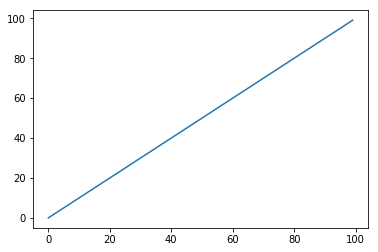

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(100));

In [5]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 3631-FEF2

 Directory of C:\Users\user\Untitled Folder

05/19/2019  01:21 PM    <DIR>          .
05/19/2019  01:21 PM    <DIR>          ..
05/18/2019  03:58 PM    <DIR>          .ipynb_checkpoints
04/13/2019  06:19 PM    <DIR>          __pycache__
05/04/2019  03:56 PM           181,079 club_mahindra.ipynb
05/11/2019  10:27 PM             2,147 crashCourse1.ipynb
05/11/2019  02:26 AM           133,467 DS+in+Python+Movie+Assignment.ipynb
04/14/2019  02:41 AM             2,310 functools.py
05/11/2019  12:49 AM            39,252 IPL+Points+Table+Dataframe.ipynb
04/14/2019  02:41 AM               243 PKG-INFO
05/19/2019  01:21 PM            13,002 pluralSight DS.ipynb
04/13/2019  06:12 PM                37 pyDemo.py
04/14/2019  02:41 AM               696 setup.py
04/13/2019  09:17 PM            18,176 Untitled.ipynb
04/13/2019  09:31 PM             2,858 Untitled1.ipynb
04/14/2019  06:27 PM            12,653 Untitled2.ipynb
04/30/201

In [6]:
%%timeit x = range(10000)
max(x)

466 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Titanic Disaster

In [8]:
import pandas as pd
import numpy as np

In [17]:
%time train_df = pd.read_csv('D:/kaggle/titanicDS/train.csv', index_col='PassengerId')

Wall time: 11 ms


In [18]:
%time test_df = pd.read_csv('D:/kaggle/titanicDS/test.csv', index_col='PassengerId')

Wall time: 17 ms


### Basic Structure

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [24]:
test_df['Survived'] = -888

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [30]:
df = pd.concat((train_df,test_df),sort=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [43]:
df[(df.SibSp == 1) & (df.Sex == 'male')].head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
14,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,3,male,1,0,347082
35,28.0,NaN,C,82.1708,"Meyer, Mr. Edgar Joseph",0,1,male,1,0,PC 17604
36,42.0,NaN,S,52.0000,"Holverson, Mr. Alexander Oskar",0,1,male,1,0,113789
47,NaN,NaN,Q,15.5000,"Lennon, Mr. Denis",0,3,male,1,0,370371


In [46]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [77]:
df.groupby('Embarked').Fare.median()

Embarked
C    28.51875
Q     7.75000
S    13.00000
Name: Fare, dtype: float64

In [73]:
df.groupby('Embarked').Fare.quantile(.75)

Embarked
C    78.966675
Q    10.197900
S    27.750000
Name: Fare, dtype: float64

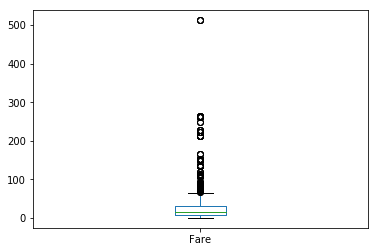

In [85]:
df.Fare.plot(kind='box');

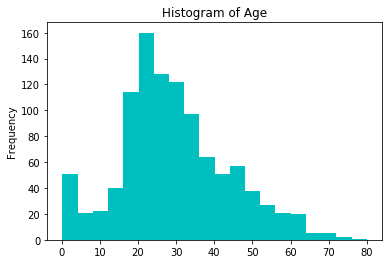

In [104]:
df.Age.plot(kind='hist', title='Histogram of Age', color='c',bins=20);

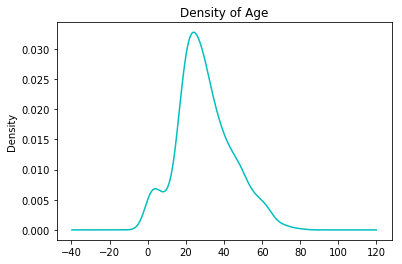

In [106]:
df.Age.plot(kind='kde', title='Density of Age', color='c');

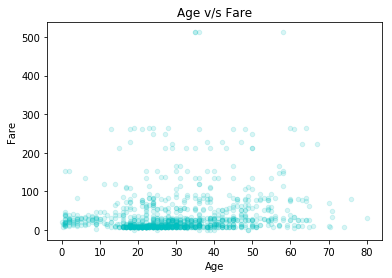

In [108]:
df.plot.scatter(x='Age',y='Fare', color='c', title='Age v/s Fare',alpha=0.15);

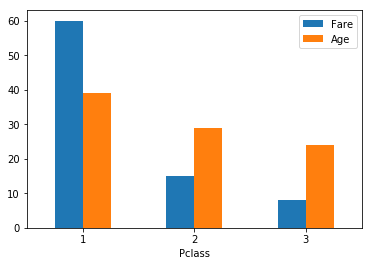

In [119]:
df.groupby('Pclass').agg({'Fare':'median','Age':'median'}).plot(kind='bar',rot=0);

#### Feature : Embarked

In [126]:
df.groupby(['Pclass','Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [127]:
df.loc[pd.isnull(df.Embarked),'Embarked'] = 'C'

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


#### Feature : Fare

In [131]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [132]:
df.groupby(['Pclass','Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,78.2667,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [135]:
df.loc[pd.isnull(df.Fare),'Fare'] = df[(df.Pclass == 3) & (df.Embarked == 'S')].Fare.median()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


#### Feature : Age

In [1]:
df[df.Age.notnull()].Age

NameError: name 'df' is not defined

In [151]:
def titleHead(name):
    full_name = name.split(',')[1]
    title = full_name.split('.')[0]
    return title

In [153]:
df.Name.map(lambda x: titleHead(x)).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [146]:
def getTitle(name):
    title_group = {
        'mr':'Mr', 
        'mrs':'Mrs', 
        'miss':'Miss', 
        'master':'Master', 
        'don':'Sir', 
        'rev':'Sir', 
        'dr':'Officer', 
        'mme':'Mrs', 
        'ms':'Miss',
        'major':'Officer', 
        'lady':'Lady', 
        'sir':'Sir', 
        'mlle':'Miss', 
        'col':'Officer', 
        'capt':'Officer', 
        'the countess':'Lady',
        'jonkheer':'Sir', 
        'dona':'Lady'
    }
    
    full_name = name.split(',')[1]
    title = full_name.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [149]:
df['Title'] = df.Name.apply(getTitle)

In [150]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


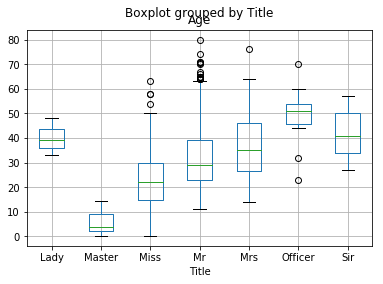

In [154]:
df[df.Age.notnull()].boxplot('Age','Title');

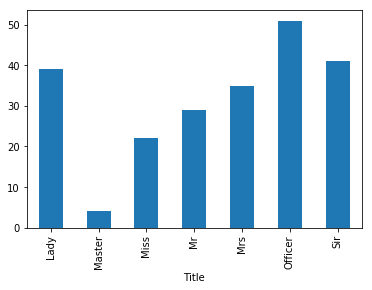

In [159]:
df[df.Age.notnull()].groupby('Title').Age.median().plot(kind='bar');

In [160]:
df.loc[pd.isnull(df.Age),'Age'] = df.groupby('Title').Age.transform('median')

In [171]:
df['Fare_Bin'] = pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']) #discretization

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 174.4+ KB


### Feature Engineering

#### Feature : Age State (Adult or Child)

In [174]:
df['AgeState'] = np.where(df.Age >= 18, 'Adult','Child')

In [177]:
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [182]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


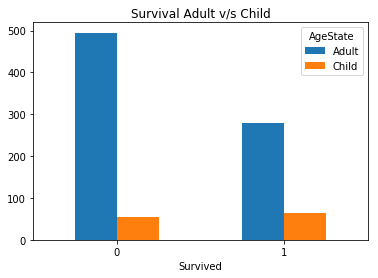

In [183]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState).plot(kind='bar',rot=0,title='Survival Adult v/s Child');

#### Feature : Family Size

In [185]:
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

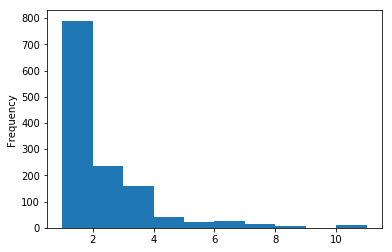

In [190]:
df.FamilySize.plot(kind='hist', rot=0);

In [192]:
df[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11


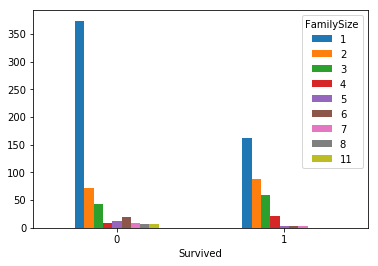

In [194]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].FamilySize).plot(kind='bar',rot=0);

In [195]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


#### Feature : IsMother

In [202]:
df['IsMother'] = np.where(((df.AgeState == 'Adult') & (df.Title == 'Mrs') & (df.Parch > 0)),1,0)

In [204]:
df['IsMother'].value_counts()

0    1223
1      86
Name: IsMother, dtype: int64

In [207]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,302,40


#### Feature : Deck

In [214]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [217]:
df.loc[df.Cabin == 'T','Cabin'] = np.NaN

In [218]:
def getDeck(cabin):
   return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'z')
df['Deck'] = df.Cabin.apply(getDeck)

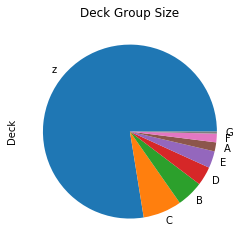

In [234]:
df.Deck.value_counts().plot(kind='pie', title='Deck Group Size');

In [237]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [243]:
df[(df.Deck == 'A') & (df.Survived == -888)]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother,Deck
PassengerId,,,,,,,,,,,,,,,,,
920,41.0,A21,S,30.5000,"Brady, Mr. John Bertram",0,1,male,0,-888,113054,Mr,high,Adult,1,0,A
938,45.0,A9,C,29.7000,"Chevre, Mr. Paul Romaine",0,1,male,0,-888,PC 17594,Mr,high,Adult,1,0,A
1004,36.0,A29,C,31.6792,"Evans, Miss. Edith Corse",0,1,female,0,-888,PC 17531,Miss,very_high,Adult,1,0,A
1100,33.0,A11,C,27.7208,"Rosenbaum, Miss. Edith Louise",0,1,female,0,-888,PC 17613,Miss,high,Adult,1,0,A
1185,53.0,A34,S,81.8583,"Dodge, Dr. Washington",1,1,male,1,-888,33638,Officer,very_high,Adult,3,0,A
1223,39.0,A18,C,29.7000,"Dulles, Mr. William Crothers",0,1,male,0,-888,PC 17580,Mr,high,Adult,1,0,A
1266,54.0,A34,S,81.8583,"Dodge, Mrs. Washington (Ruth Vidaver)",1,1,female,1,-888,33638,Mrs,very_high,Adult,3,1,A


### Converting Categorical Feature to Quantative Feature

In [244]:
#Sex
df['Is_Male'] = np.where(df.Sex == 'male',1,0)

In [247]:
df_final = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [249]:
df_final['Is_Male'] = df['Is_Male']

In [252]:
df_final.columns

Index(['Age', 'Cabin', 'Fare', 'Name', 'Parch', 'Sex', 'SibSp', 'Survived',
       'Ticket', 'FamilySize', 'IsMother', 'Is_Male', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_z', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir',
       'Fare_Bin_very_low', 'Fare_Bin_low', 'Fare_Bin_high',
       'Fare_Bin_very_high', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'AgeState_Adult', 'AgeState_Child'],
      dtype='object')

In [253]:
df_final.head(1)

,Age,Cabin,Fare,Name,Parch,Sex,SibSp,Survived,Ticket,FamilySize,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,7.25,"Braund, Mr. Owen Harris",0,male,1,0,A/5 21171,2,...,0,1,0,0,0,0,0,1,1,0


In [254]:
df_final.drop(['Cabin','Name','Ticket','Parch','Sex','SibSp'],inplace=True,axis=1)

In [256]:
df_final.loc[df.Survived == -888].head()

,Age,Fare,Survived,FamilySize,IsMother,Is_Male,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,7.8292,-888,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
893,47.0,7.0000,-888,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
894,62.0,9.6875,-888,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
895,27.0,8.6625,-888,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
896,22.0,12.2875,-888,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### Creating Visualization

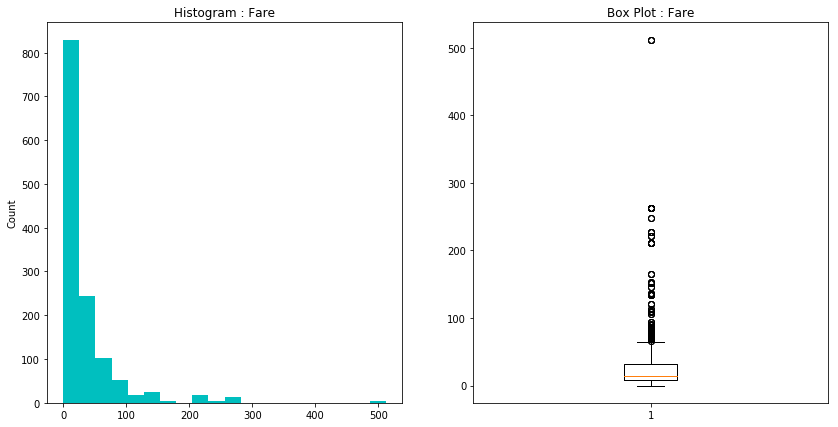

In [265]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (14,7))

#plot 1
ax1.hist(df.Fare,bins=20,color='c')
ax1.set_title('Histogram : Fare')
ax1.set_ylabel('Count')

#plot 2
ax2.boxplot(df.Fare.values)
ax2.set_title('Box Plot : Fare')

plt.show()